## 1. This is the very beginning.
Stick raw data into Spyglass Database.

In [1]:
import os
import numpy as np

import spyglass as nd
import datajoint as dj
import multiprocessing
import spyglass.data_import as sdi

# ignore datajoint+jupyter async warnings
import warnings
warnings.simplefilter('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore', category=ResourceWarning)
warnings.simplefilter('ignore', category=UserWarning)

import matplotlib.pyplot as plt

Exception ignored in: <module 'collections.abc' from '/home/shijiegu/anaconda3/envs/spyglass/lib/python3.9/collections/abc.py'>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
KeyboardInterrupt: 
<frozen importlib._bootstrap>:228: RuntimeWarning: Cython module failed to patch module with custom type
[2025-04-19 16:00:47,976][INFO]: Connecting shijiegu-alt@lmf-db.cin.ucsf.edu:3306
[2025-04-19 16:00:48,110][INFO]: Connected shijiegu-alt@lmf-db.cin.ucsf.edu:3306


In [2]:
from spyglass.common import Session

In [3]:
from pathlib import Path
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
os.environ['SPYGLASS_BASE_DIR'] = "/stelmo/nwb/"
os.environ['SPYGLASS_RECORDING_DIR'] = "/stelmo/nwb/recording"
os.environ['SPYGLASS_SORTING_DIR'] = "/stelmo/nwb/sorting"
os.environ['SPYGLASS_WAVEFORMS_DIR'] = "/stelmo/nwb/waveforms"
os.environ['SPYGLASS_TEMP_DIR'] = "/stelmo/nwb/tmp"
os.environ['KACHERY_DAEMON_HOST'] = "typhoon"
os.environ['KACHERY_DAEMON_PORT'] = "14747"
os.environ['KACHERY_STORAGE_DIR'] = "/stelmo/nwb/kachery-storage"
os.environ['KACHERY_TEMP_DIR'] = "/stelmo/nwb/tmp"
os.environ['FIGURL_CHANNEL'] = "franklab2"
os.environ['DJ_SUPPORT_FILEPATH_MANAGEMENT'] = "TRUE"
dj.config["enable_python_native_blobs"] = True

In [4]:
dj.config["stores"]['raw']['location']='/stelmo/nwb/raw'
dj.config["stores"]['raw']['stage']='/stelmo/nwb/raw'
dj.config["stores"]['analysis']['location']='/stelmo/nwb/analysis'
dj.config["stores"]['analysis']['stage']='/stelmo/nwb/analysis'

In [5]:
dj.config

{   'connection.charset': '',
    'connection.init_function': None,
    'custom': {   'debug_mode': 'false',
                  'dlc_dirs': {   'base': '/stelmo/nwb/deeplabcut',
                                  'output': '/stelmo/nwb/deeplabcut/output',
                                  'project': '/stelmo/nwb/deeplabcut/projects',
                                  'video': '/stelmo/nwb/video'},
                  'kachery_dirs': {   'cloud': '/stelmo/nwb/kachery_storage',
                                      'storage': '/stelmo/nwb/kachery-storage',
                                      'temp': '/stelmo/nwb/tmp'},
                  'kachery_zone': 'franklab.default',
                  'spyglass_dirs': {   'analysis': '/stelmo/nwb/analysis',
                                       'base': '/stelmo/nwb/',
                                       'raw': '/stelmo/nwb/raw',
                                       'recording': '/stelmo/nwb/recording',
                                       'sor

## Add data to database

In [7]:
sdi.insert_sessions('julio20230811.nwb')

[16:01:36][INFO] Spyglass: Creating a copy of NWB file julio20230811.nwb with link to raw ephys data: julio20230811_.nwb
[16:02:29][INFO] Spyglass: Populating Session...
[16:02:30][INFO] Spyglass: No config found at file path /stelmo/nwb/raw/julio20230811_spyglass_config.yaml
[16:02:30][INFO] Spyglass: Institution...
[16:02:30][INFO] Spyglass: Lab...
[16:02:30][INFO] Spyglass: LabMember...
[16:02:30][INFO] Spyglass: Subject...
[16:02:30][INFO] Spyglass: Populate CameraDevice...
[16:02:30][INFO] Spyglass: Inserted camera devices ['sleep_camera', 'maze_camera']
[16:02:30][INFO] Spyglass: Populate Probe...
[16:02:30][INFO] Spyglass: Probe ID 'tetrode_12.5' already exists in the database. Spyglass will use that and not create a new Probe, Shanks, or Electrodes.
[16:02:30][INFO] Spyglass: Inserted probes {'tetrode_12.5'}
[16:02:30][INFO] Spyglass: Skipping Apparatus for now...
[16:02:30][INFO] Spyglass: IntervalList...
[16:02:31][INFO] Spyglass: Populating ElectrodeGroup...
[16:02:31][INFO]

In [9]:
(Session & {"subject_id":"julio"}).fetch("nwb_file_name")

array(['julio20230811_.nwb'], dtype=object)

## Check it is in

In [11]:
Session & {"experiment_description":'Four-Arm Sequence',"subject_id":"julio"}

*nwb_file_name subject_id     institution_na lab_name       session_id     session_descri session_start_ timestamps_ref experiment_des
+------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+
julio20230811_ julio          University of  Loren Frank    julio_20230811 Seq2           2023-08-11 11: 1970-01-01 00: Four-Arm Seque
 (Total: 1)

### For a normal operation, that's it. End here

### In case you need to delete

In [28]:
(nd.common.Nwbfile() & {"nwb_file_name": "haydn20230603_.nwb"})

*nwb_file_name nwb_file_a
+------------+ +--------+

 (Total: 0)

In [27]:
(nd.common.Nwbfile() & {"nwb_file_name": "haydn20230603_.nwb"}).delete()

[11:28:16][WARNING] Spyglass: Could not find lab team associated with Nwbfile.
Be careful not to delete others' data.
[11:28:17][INFO] Spyglass: Building merge cache for nwbfile.
	Found 5 downstream merge tables
[2024-11-15 11:28:17,930][INFO]: Deleting 0 rows from `common_nwbfile`.`nwbfile`
[2024-11-15 11:28:17,931][WARNING]: Nothing to delete.


### Below are code for debugging. 

In [16]:
!ls $SPYGLASS_BASE_DIR/raw/molly*

/stelmo/nwb//raw/molly20220415.nwb   /stelmo/nwb//raw/molly20220417_.nwb
/stelmo/nwb//raw/molly20220415_.nwb  /stelmo/nwb//raw/molly20220418.nwb
/stelmo/nwb//raw/molly20220416.nwb   /stelmo/nwb//raw/molly20220419.nwb
/stelmo/nwb//raw/molly20220416_.nwb  /stelmo/nwb//raw/molly20220420.nwb
/stelmo/nwb//raw/molly20220417.nwb   /stelmo/nwb//raw/molly20220420_.nwb


In [6]:
from spyglass.common.common_interval import IntervalList
Session & {'nwb_file_name':'lewis20240106_.nwb'}
IntervalList & {'nwb_file_name':'lewis20240106_.nwb'}

*nwb_file_name *interval_list valid_time pipeline    
+------------+ +------------+ +--------+ +----------+
lewis20240106_ 01_Rev2Sleep1  =BLOB=                 
lewis20240106_ 02_Rev2Session =BLOB=                 
lewis20240106_ 03_Rev2Sleep2  =BLOB=                 
lewis20240106_ 04_Rev2Session =BLOB=                 
lewis20240106_ 05_Rev2Sleep3  =BLOB=                 
lewis20240106_ 06_Rev2Session =BLOB=                 
lewis20240106_ 07_Rev2Sleep4  =BLOB=                 
lewis20240106_ 08_Rev2Session =BLOB=                 
lewis20240106_ 09_Rev2Sleep5  =BLOB=                 
lewis20240106_ pos 0 valid ti =BLOB=     position    
lewis20240106_ pos 1 valid ti =BLOB=     position    
lewis20240106_ pos 2 valid ti =BLOB=     position    
   ...
 (Total: 19)

In [8]:
dates=['20220418','20220419']

In [17]:
%%capture stored_output
nd.insert_sessions('molly20220418.nwb')
nd.insert_sessions('molly20220419.nwb')

In [9]:
%%capture stored_output
with multiprocessing.Pool(2) as p:
    p.map(nd.insert_sessions,['molly'+s+'.nwb' for s in dates])

In [12]:
stored_output.show()

Creating a copy of NWB file isaac20230519.nwb with link to raw ephys data: isaac20230519_.nwb
Populate Session...
No config found at file path /stelmo/nwb/raw/isaac20230519_spyglass_config.yaml
Institution...
Lab...
LabMember...
Subject...
Populate DataAcquisitionDevice...
Inserted or referenced data acquisition device(s): dict_keys(['dataacq_device0'])

Populate CameraDevice...
Inserted camera devices ['sleep_camera', 'maze_camera']

Populate Probe...
Probe ID 'tetrode_12.5' already exists in the database. Spyglass will use that and not create a new Probe, Shanks, or Electrodes.
Inserted probes {'tetrode_12.5'}

Skipping Apparatus for now...
IntervalList...
Populate ElectrodeGroup...
Populate Electrode...
No config found at file path /stelmo/nwb/raw/isaac20230519_spyglass_config.yaml
Populate Raw...
Estimating sampling rate...
Estimated sampling rate: 30000.0
Importing raw data: Sampling rate:	30000.0 Hz
Number of valid intervals:	3
Populate SampleCount...
Populate DIOEvents...
Popula

In [40]:
# Define the name of the file that you copied and renamed; make sure it's something unique. 
nwb_file_name = 'molly20220415.nwb'
filename, file_extension = os.path.splitext(nwb_file_name)
# This is a copy of the original nwb file, except it doesn't contain the raw data (for storage reasons)
nwb_file_name2 = filename + '_' + file_extension

nd.insert_sessions(nwb_file_name)

Creating a copy of NWB file molly20220415.nwb with link to raw ephys data: molly20220415_.nwb
Populate Session...
Institution...
Lab...
LabMember...
Please add the Google user ID for Shijie Gu in the LabMember.LabMemberInfo table if you want to give them permission to manually curate sortings by this team.
Subject...
DataAcquisitionDevice...
Inserted data acquisition devices ['dataacq_device0']
CameraDevice...
Inserted camera devices ['sleep_camera', 'maze_camera']
Probe...
No conforming probe device metadata found.
Skipping Apparatus for now...
IntervalList...
Populate ExperimenterList...
Populate ElectrodeGroup...
Populate Electrode...
Populate Raw...
Estimating sampling rate...
Estimated sampling rate: 30000.0
Importing raw data: Estimated sampling rate:	30000.0 Hz
Number of valid intervals:	10
Populate SampleCount...
Populate DIOEvents...
Populate SensorData
Populate TaskEpochs
Populate StateScriptFile
Populate VideoFile
RawPosition...
Processing raw position data. Estimated sampli

In [101]:
nwb_file_name2='molly20220420_.nwb'

In [102]:
rawdata = Raw().nwb_object({'nwb_file_name':nwb_file_name2})

In [103]:
rawdata.data.shape

(865608585, 256)

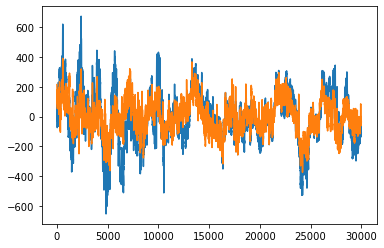

In [104]:
plt.plot(rawdata.data[1:30000,15])
plt.plot(rawdata.data[1:30000,16*4+1])

In [58]:
Raw & {'nwb_file_name':nwb_file_name2}

*nwb_file_name interval_list_ raw_object_id  sampling_rate  comments       description   
+------------+ +------------+ +------------+ +------------+ +------------+ +------------+
molly20220415_ raw data valid 6d418841-e640- 30000.0        No comment     Recording of e
 (Total: 1)

In [6]:
import pynwb

In [32]:
io = pynwb.NWBHDF5IO('/stelmo/nwb/raw/molly20220419.nwb','r')
nwbf = io.read()

epochs = nwbf.epochs.to_dataframe()

rawdata = nwbf.get_acquisition()
timestamps=np.asarray(rawdata.timestamps)

/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/base.py:167: UserWarning: Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension
  warn("Length of data does not match length of timestamps. Your data may be transposed. Time should be on "


In [55]:
posdata=nwbf.processing['behavior']['position']['series_1'].data

series_1 pynwb.behavior.SpatialSeries at 0x140641282295408
Fields:
  comments: no comments
  conversion: 0.0025
  data: <HDF5 dataset "data": shape (49114, 4), type "<i2">
  description: xloc, yloc, xloc2, yloc2
  interval: 1
  reference_frame: Upper left corner of video frame
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (49114,), type "<f8">
  timestamps_unit: seconds
  unit: meters

In [28]:
gyrodata=nwbf.processing['analog']['analog'].time_series['analog'].data

In [35]:
nwbf.processing['analog']['analog'].time_series['analog']

analog pynwb.base.TimeSeries at 0x140641282214304
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (679255959, 6), type "<i4">
  description: Headstage_GyroY   Headstage_AccelX   Headstage_GyroX   Headstage_AccelY   Headstage_AccelZ   timestamps   Headstage_GyroZ   
  interval: 1
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (679255959,), type "<f8">
  timestamps_unit: seconds
  unit: unspecified

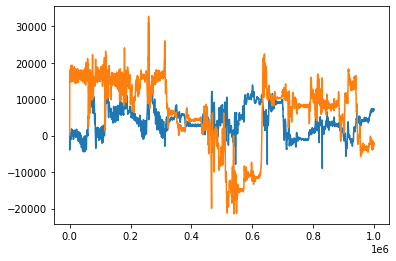

In [49]:

plt.plot(gyrodata[1:1000000,1])

plt.plot(gyrodata[1:1000000,3])

In [113]:
(IntervalList & {'nwb_file_name':nwb_file_name2})

*nwb_file_name *interval_list valid_time
+------------+ +------------+ +--------+
molly20220420_ 01_Seq2Sleep1  =BLOB=    
molly20220420_ 02_Seq2Session =BLOB=    
molly20220420_ 03_Seq2Sleep2  =BLOB=    
molly20220420_ 04_Seq2Session =BLOB=    
molly20220420_ 05_Seq2Sleep3  =BLOB=    
molly20220420_ 06_Seq2Session =BLOB=    
molly20220420_ 07_Seq2Sleep4  =BLOB=    
molly20220420_ 08_Seq2Session =BLOB=    
molly20220420_ 09_Seq2Sleep5  =BLOB=    
molly20220420_ 10_Seq2Session =BLOB=    
molly20220420_ 11_Seq2Sleep6  =BLOB=    
molly20220420_ 12_Seq2Session =BLOB=    
   ...
 (Total: 27)

In [115]:
interval_list_name=(IntervalList & {'nwb_file_name':nwb_file_name2}).fetch('interval_list_name')

In [121]:
session_time=[]
for i in range(13):
    session_time.append((IntervalList & {'nwb_file_name':nwb_file_name2,'interval_list_name':interval_list_name[i]}).fetch1('valid_times'))

In [119]:
session_time

[array([[1.65047092e+09, 1.65047273e+09]]),
 array([[1.65047277e+09, 1.65047496e+09]]),
 array([[1.65047508e+09, 1.65047739e+09]]),
 array([[1.65047745e+09, 1.65047969e+09]]),
 array([[1.65047983e+09, 1.65048165e+09]]),
 array([[1.6504817e+09, 1.6504840e+09]]),
 array([[1.65048420e+09, 1.65048607e+09]]),
 array([[1.65048626e+09, 1.65048863e+09]]),
 array([[1.65048909e+09, 1.65049150e+09]]),
 array([[1.65049173e+09, 1.65049430e+09]]),
 array([[1.65049442e+09, 1.65049718e+09]]),
 array([[1.65049748e+09, 1.65049983e+09]]),
 array([[1.65049990e+09, 1.65050174e+09]])]

In [111]:
Seq2Session2

array([[1.6504817e+09, 1.6504840e+09]])

In [86]:
Seq2Session2_pos=(IntervalList & {'nwb_file_name':nwb_file_name2,'interval_list_name':'pos 5 valid times'}).fetch1('valid_times')

In [106]:
valid_times=(IntervalList & {'nwb_file_name':nwb_file_name2,'interval_list_name':'raw data valid times'}).fetch1('valid_times')
valid_times

array([[1.65047092e+09, 1.65047158e+09],
       [1.65047158e+09, 1.65047158e+09],
       [1.65047158e+09, 1.65047158e+09],
       [1.65047158e+09, 1.65047162e+09],
       [1.65047162e+09, 1.65047162e+09],
       [1.65047162e+09, 1.65047162e+09],
       [1.65047162e+09, 1.65047162e+09],
       [1.65047162e+09, 1.65047162e+09],
       [1.65047162e+09, 1.65047162e+09],
       [1.65047162e+09, 1.65047162e+09],
       [1.65047162e+09, 1.65047162e+09],
       [1.65047162e+09, 1.65047162e+09],
       [1.65047162e+09, 1.65047176e+09],
       [1.65047176e+09, 1.65047176e+09],
       [1.65047176e+09, 1.65047176e+09],
       [1.65047176e+09, 1.65047176e+09],
       [1.65047176e+09, 1.65047176e+09],
       [1.65047176e+09, 1.65047273e+09],
       [1.65047277e+09, 1.65047496e+09],
       [1.65047508e+09, 1.65047739e+09],
       [1.65047745e+09, 1.65047969e+09],
       [1.65047983e+09, 1.65048165e+09],
       [1.65048170e+09, 1.65048400e+09],
       [1.65048420e+09, 1.65048607e+09],
       [1.650486

In [127]:
i=1
valid_times[i,0],valid_times[i,1]

(1650471577.9359105, 1650471577.9383771)

In [128]:
valid_times[i,1]-valid_times[i,0]

0.0024666786193847656

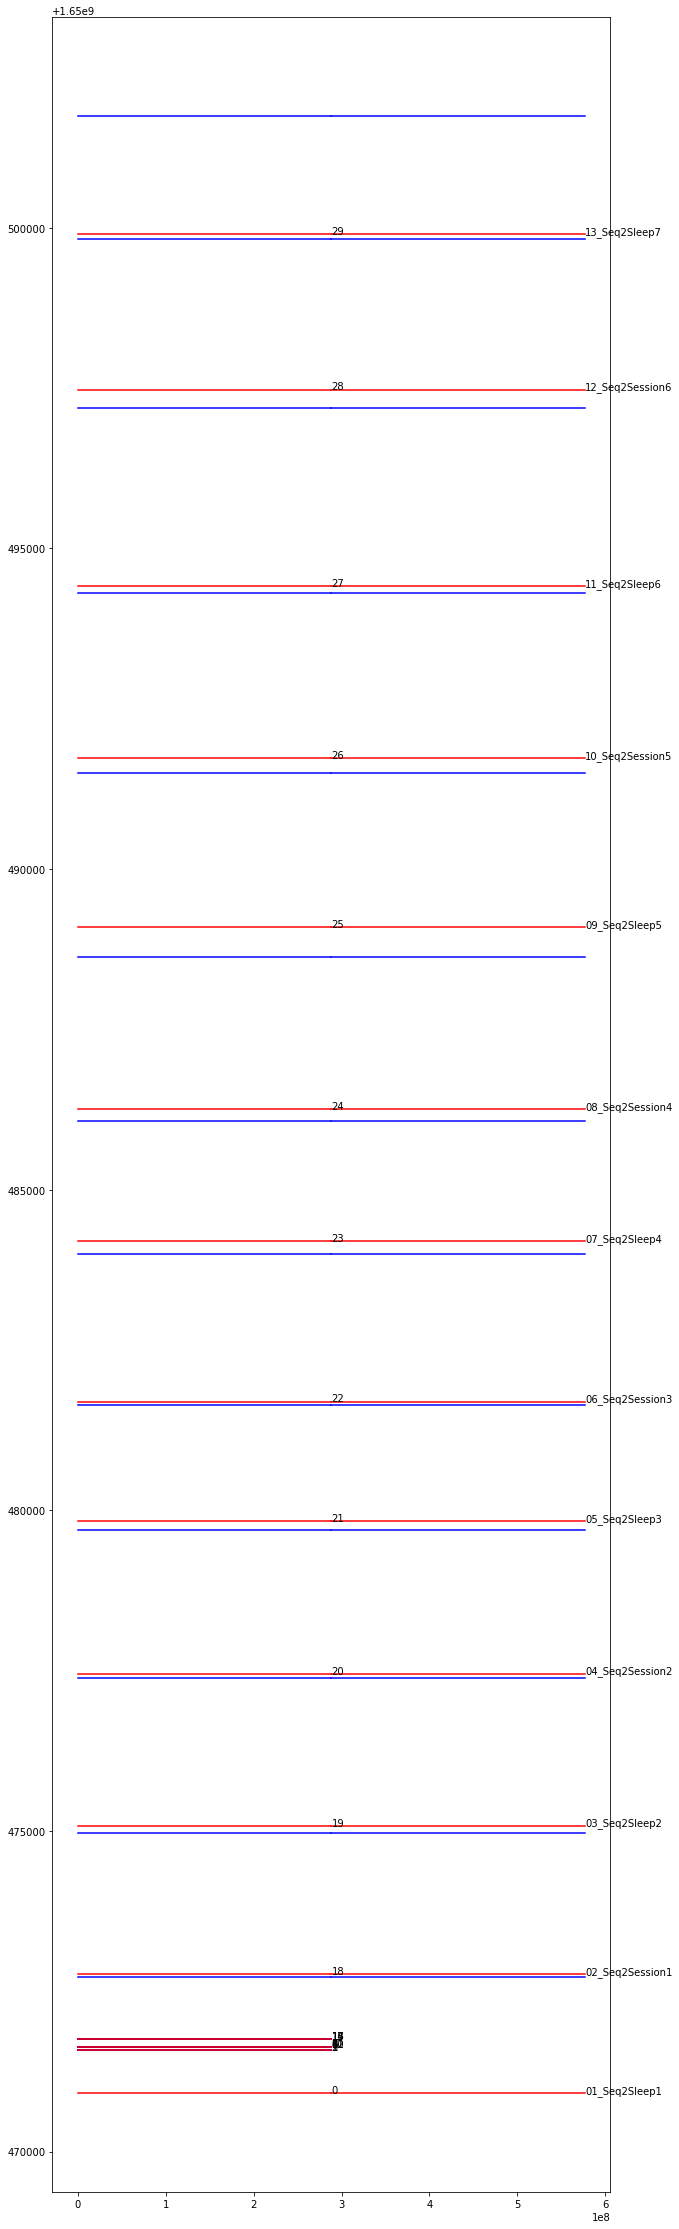

In [124]:

plt.figure(figsize=(10,40))
#plt.plot(timestamps)
filelength=len(timestamps)
for i in range(np.shape(valid_times)[0]):
    plt.plot([0,filelength/3],[valid_times[i,0],valid_times[i,0]],'r')
    plt.plot([0,filelength/3],[valid_times[i,1],valid_times[i,1]],'b')
    plt.text(round(filelength/3),valid_times[i,0],str(i))
    
    
for i in range(np.shape(session_time)[0]):
    plt.plot([filelength/3,2*filelength/3],[session_time[i][0,0],session_time[i][0,0]],'r')
    plt.plot([filelength/3,2*filelength/3],[session_time[i][0,1],session_time[i][0,1]],'b')
    plt.text(round(2*filelength/3),session_time[i][0,0],interval_list_name[i])


In [18]:
(IntervalList & {'nwb_file_name':nwb_file_name2, 'interval_list_name':'07_Seq2Sleep3'}).fetch1('valid_times')

array([[1.65005882e+09, 1.65006057e+09]])

## Make LFP

In [51]:
FirFilter().create_standard_filters()

In [70]:
electrode_ids = (Electrode & {'nwb_file_name' : nwb_file_name2}).fetch('electrode_id')
lfp_electrode_ids = electrode_ids
LFPSelection().set_lfp_electrodes(nwb_file_name2, lfp_electrode_ids.tolist())

Deleting 0 rows from `common_ephys`.`l_f_p_selection`
Nothing to delete.


In [ ]:
LFP().populate([LFPSelection & {'nwb_file_name':nwb_file_name2}])

LFP: found 10 of 10 intervals > 1.0 sec long.
Writing new NWB file molly20220416_JR1ZROCK77.nwb


IOStream.flush timed out


Filtering data
Interval 0: loading data into memory
Interval 1: loading data into memory
Interval 2: loading data into memory
Interval 3: leaving data on disk


In [ ]:
LFP&{'nwb_file_name':nwb_file_name2}